In [25]:
import pandas as pandas
import numpy as numpy

data = pandas.read_csv("data/data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [27]:
# Replace all '?' characters with numpy NaN 
data.replace('?', numpy.nan, inplace= True)

# Update the columns type of age and fare
# to a float64
data = data.astype({"age": numpy.float64, "fare": numpy.float64})
data['age'].fillna(data['age'].median(), inplace = True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
# Replace string data with numerical data
# for gender distribution 
data.replace({'male': 1, 'female': 0}, inplace=True)


In [19]:



# Calculate the variables that most
# strongly correlate with the survived boolean
data.corr().abs()[["survived"]]



,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [5]:
# Clustering numerical data of passengers





In [6]:

# check if for a given passenger, the number of sibsp (sibling/spouse) and parch is greater than 0 and, if so, 
# you can then say that they had a relative on board. Add these to a new column called 'relatives' 
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:

# Assign a sub-set of our data as main data (we remove 'sibsp' and 'parch' ) and drop all
# numpy NaN values so that we are left with a clean dataset
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
data.corr().abs()[["survived"]]

,survived
sex,0.537719
pclass,0.319979
age,0.053958
relatives,0.206754
fare,0.249164
survived,1.000000


In [8]:
# Dataset is now ready for machine learning, import
# required libraries
from sklearn.model_selection import train_test_split

# Create four variables and assign all data equally
# Two are of training, two are for testing (to validate accuracy)
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)




In [9]:
# Normalize all inputs so that all data
# is scaled equally
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Create the two variables with normalised data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)



In [10]:
# There's various ML algorithms to apply, in order to help
# you choose there's a chart to help you choose here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# In this example, we go with the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB


In [14]:
# Could use a neural net:  https://code.visualstudio.com/docs/python/data-science-tutorial

from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

classifiers = []
model = GaussianNB()
classifiers.append(model)

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)



In [15]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of GaussianNB(priors=None, var_smoothing=1e-09) is 0.7464114832535885
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.8421052631578947
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.7607655502392344
Accuracy of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
             

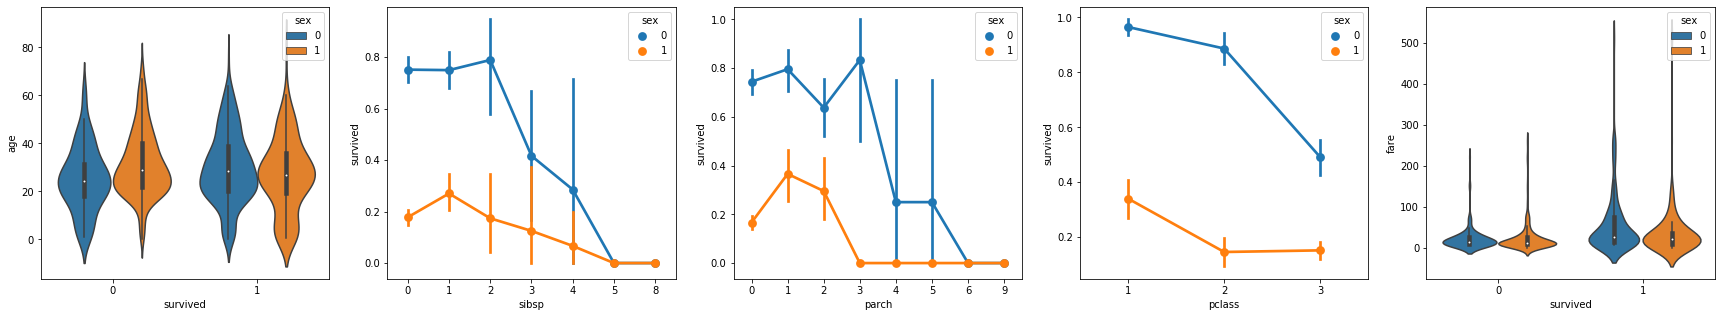

In [4]:

# Some plotting examples of the data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])